# Linear Regression
This is a **specific type of regression analysis**. It assumes a linear relationship between the independent and dependent variables. In this data analytics, we will create a **Linear Regression Model** to create predict the value of **psa** base on the other features in the dataset, **ProstateData.csv**. The **psa** is an antigen which elevanted in the presense of prostate cancer.

Table of Contenst:
- Setup
- Import Data
- Explore Data Analysis (EDA)
- Build Model
- Evaluate Model
- Model Equation

## Setup

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats # Q_Q plot
from scipy.stats import ttest_ind # static test
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# from sklearn.preprocessing import LabelEncoder

## Import Data

In [2]:
df = pd.read_csv('../data/ProstateData.csv')

## EDA

In [6]:
print('Shape: ', df.shape)
print('Columns: ', df.columns)
print(df.info())
print(df.describe())
df.head()

Shape:  (97, 10)
Columns:  Index(['lcavol', 'lweight', 'age', 'lbph', 'svi', 'lcp', 'gleason', 'pgg45',
       'lpsa', 'train'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   lcavol   97 non-null     float64
 1   lweight  97 non-null     float64
 2   age      97 non-null     int64  
 3   lbph     97 non-null     float64
 4   svi      97 non-null     int64  
 5   lcp      97 non-null     float64
 6   gleason  97 non-null     int64  
 7   pgg45    97 non-null     int64  
 8   lpsa     97 non-null     float64
 9   train    97 non-null     object 
dtypes: float64(5), int64(4), object(1)
memory usage: 7.7+ KB
None
          lcavol    lweight        age       lbph        svi        lcp  \
count  97.000000  97.000000  97.000000  97.000000  97.000000  97.000000   
mean    1.350010   3.628943  63.865979   0.100356   0.216495  -0.179366  

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa,train
0,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0,-0.430783,T
1,-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0,-0.162519,T
2,-0.510826,2.691243,74,-1.386294,0,-1.386294,7,20,-0.162519,T
3,-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0,-0.162519,T
4,0.751416,3.432373,62,-1.386294,0,-1.386294,6,0,0.371564,T


Columns of `df`:
- **lcavol**: log(cancer volume)
- **lweight**: log(prostate weight)
- **age**: age
- **lbph**: log(begining prostate hyperplasia amount)
- **svi**: seminal vesicle invasion. This refers to a tumor infiltration orginating from external tumor cells. There are `0`s and `1`s to represent the 2 different types of **SVI**. 
- **lcp**: log(capsular penetration)
- **gleason**: Gleason score
- **pgg45**: percentage Gleason scores 4 or 5
- **lpsa**: log(prostate specific antigen)
- **train**: logical index used to differentiate train from test points. Consist of `T`s and `F`s.

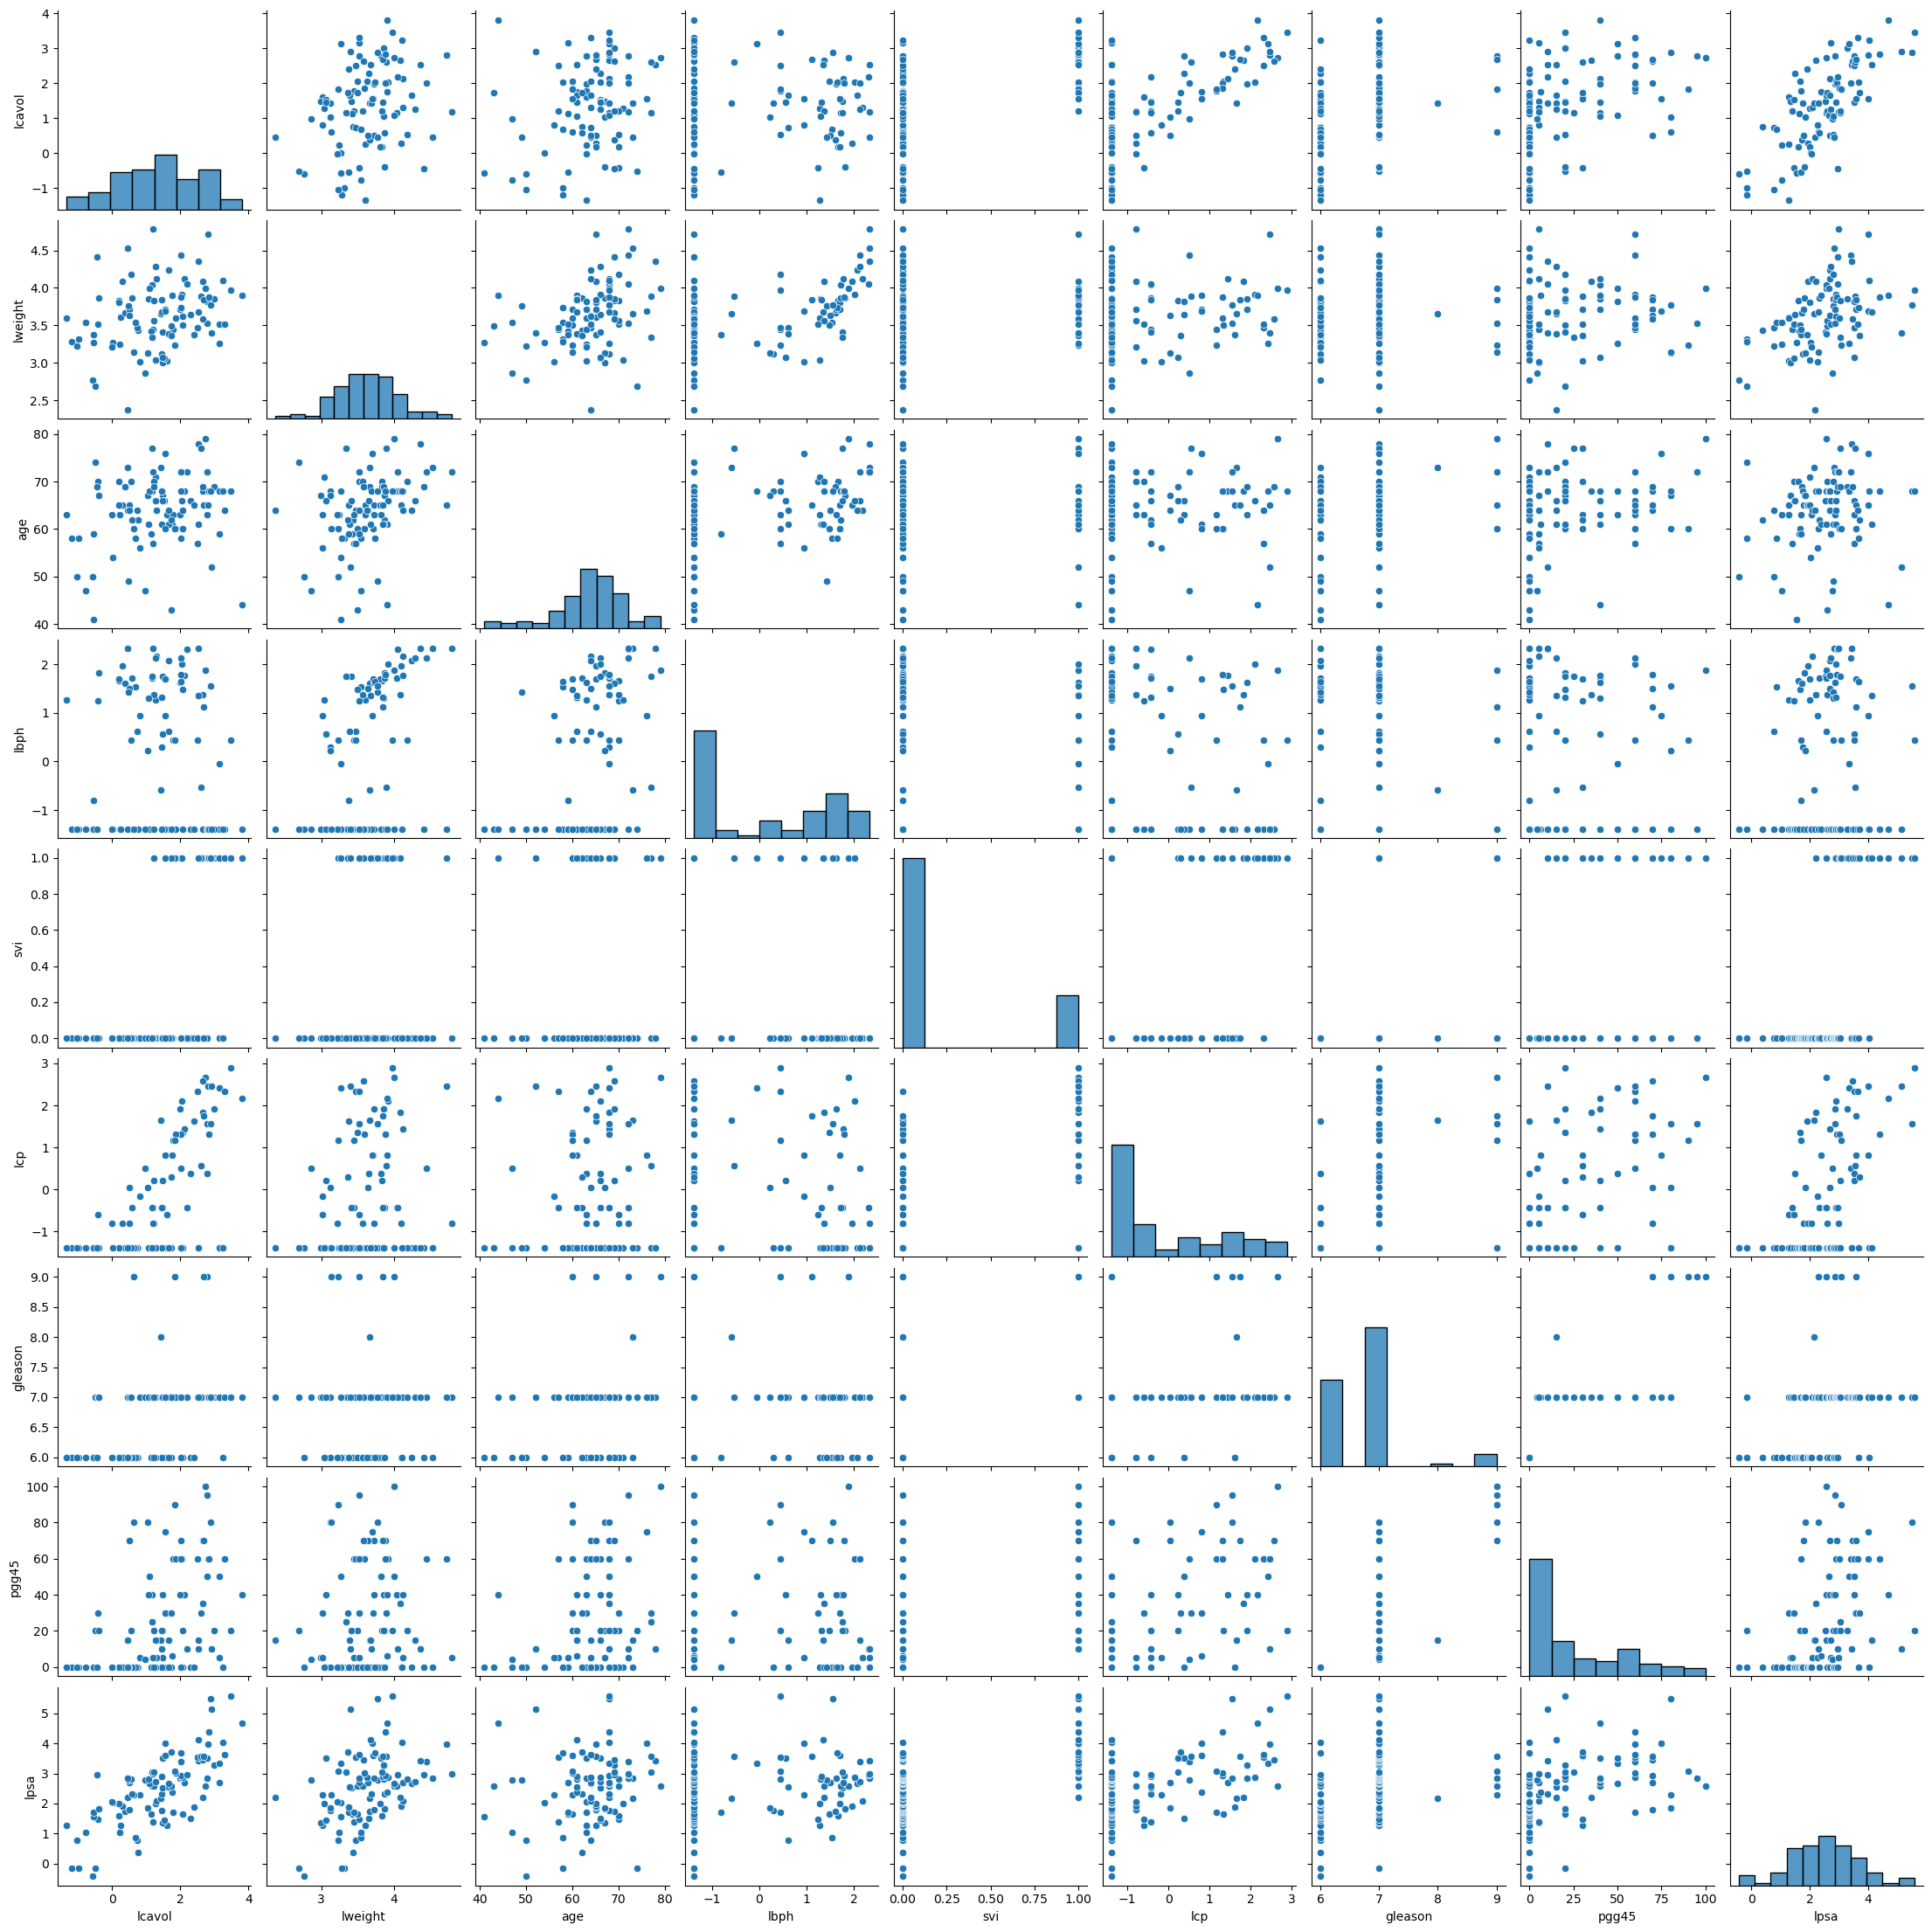

In [7]:
sns.pairplot(df)

### Missing Data

In [14]:
print(f'Number of missing data per column: \n{df.isnull().sum()}')
print(f'\nPercentage of missing data per column: \n{df.isnull().sum() / df.shape[0] * 100}')
print(f'\nTotal missing data: {df.isnull().sum().sum()}')

Number of missing data per column: 
lcavol     0
lweight    0
age        0
lbph       0
svi        0
lcp        0
gleason    0
pgg45      0
lpsa       0
train      0
dtype: int64

Percentage of missing data per column: 
lcavol     0.0
lweight    0.0
age        0.0
lbph       0.0
svi        0.0
lcp        0.0
gleason    0.0
pgg45      0.0
lpsa       0.0
train      0.0
dtype: float64

Total missing data: 0


### Categorical Data

In [19]:
print(f'Number of unique values in {df.svi.value_counts()}')
print(f'\nNumber of unique values in {df["train"].value_counts()}')

Number of unique values in svi
0    76
1    21
Name: count, dtype: int64

Number of unique values in train
T    67
F    30
Name: count, dtype: int64


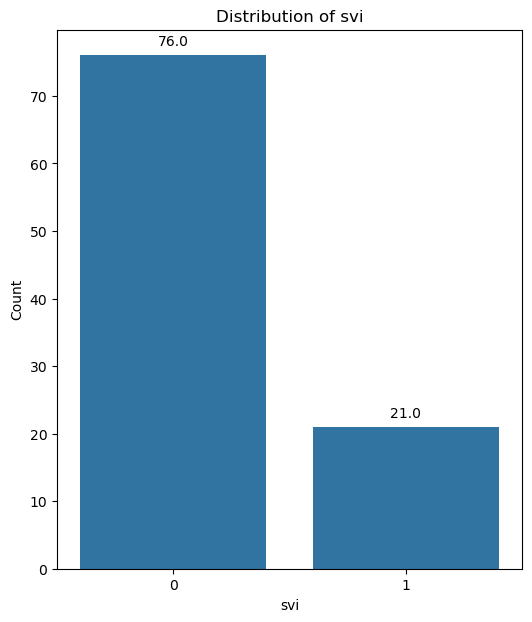

In [ ]:
# Plot the distribution
plt.figure(figsize=(6, 7))
ax = sns.countplot(x='svi', data=df)

plt.title('Distribution of svi')
plt.xlabel('svi')
plt.ylabel('Count of Data')

# Annotate the plot with counts
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

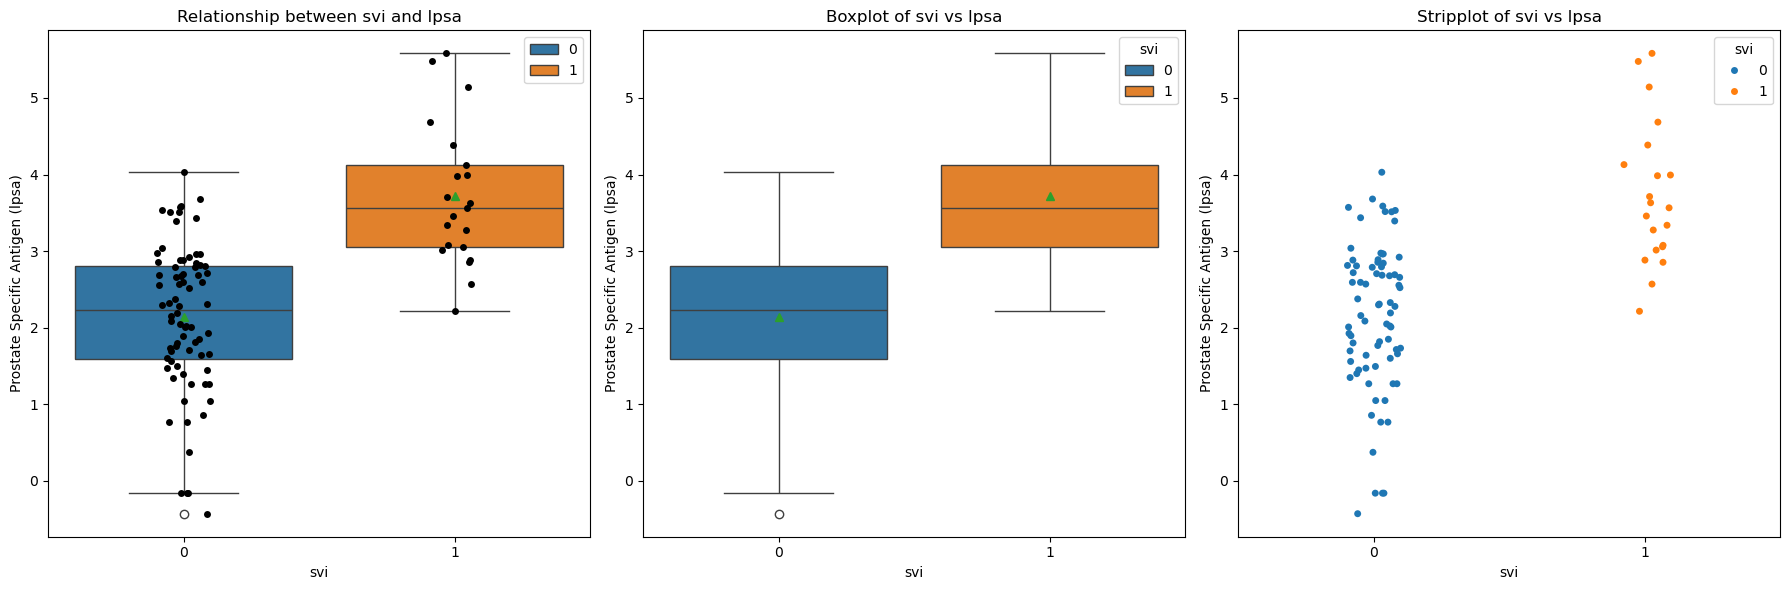

In [80]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# First subplot: Boxplot and Stripplot
sns.boxplot(x='svi', y='lpsa', data=df, hue='svi', showmeans=True, ax=axes[0])
sns.stripplot(x=df['svi'],y=df['lpsa'], jitter=True, color='black', ax=axes[0])
axes[0].set_title('Relationship between svi and lpsa')
axes[0].set_xlabel('svi')
axes[0].set_ylabel('Prostate Specific Antigen (lpsa)')

# Second subplot: Boxplot
sns.boxplot(x='svi', y='lpsa', data=df, hue='svi', showmeans=True, ax=axes[1])
axes[1].set_title('Boxplot of svi vs lpsa')
axes[1].set_xlabel('svi')
axes[1].set_ylabel('Prostate Specific Antigen (lpsa)')

# Third subplot: Stripplot
sns.stripplot(x='svi', y='lpsa', data=df, jitter=True, hue='svi', ax=axes[2])
axes[2].set_title('Stripplot of svi vs lpsa')
axes[2].set_xlabel('svi')
axes[2].set_ylabel('Prostate Specific Antigen (lpsa)')

plt.tight_layout() # To ensure that the subplots do not overlap
plt.show()

***Observations from the Relationship Boxplot between `svi` and `lpsa`***

**1. Difference Between Groups**:
    
The median line of the second group (`svi` = 1) lies outside the range of the first group (`svi` = 0), indicating a likely difference between the two groups.

**2. Group 1 (svi = 0)**:

- The median line of the box is slightly above the mean, indicating a slight skewness.
- The upper quartile (75th percentile) is slightly smaller than the lower quartile (25th percentile).
- The upper whisker is noticeably shorter than the lower whisker.
- Therefore, the distribution is negatively (left) skewed.

**3. Group 2 (svi = 1)**:

- The median line of the box is slightly below the mean, indicating a slight skewness.
- The upper quartile is slightly smaller than the lower quartile.
- The upper whisker is longer than the lower whisker.
- Therefore, the distribution is positively (right) skewed.

**4. Data Concentration**:

- Most data points are concentrated in the middle section of the boxes.
- The box length of the first group (`svi` = 0) is longer than that of the second group (`svi` = 1), indicating that the data in the first group is more dispersed than in the second group.

**5. Outliers**:

- There is one outlier located below the bottom whisker in the first group (`svi` = 0).
- There are no outliers in the second group (`svi` = 1).

***Interpreting the Relationship betweeen `svi` and `lpsa`:***

**1. Group 1 (svi = 0)**:

- **Distribution**: Negatively skewed with a larger interquartile range (IQR), indicating greater variability in `lpsa` values.
- **Outliers**: One outlier below the lower whisker.

**2. Group 2 (svi = 1)**:

- **Distribution**: Positively skewed with a smaller IQR, indicating more concentrated `lpsa` values.
- **Outliers**: No outliers.

**3. Comparison**:

- **Variability**: Group 1 shows greater variability in `lpsa` values compared to Group 2.
- **Central Tendency**: Group 1 tends towards higher `lpsa` values, while Group 2 tends towards lower `lpsa` values.

***Conclusion***

Seminal vesicle invasion (`svi`) is associated with distinct distributions of `lpsa` values. Group 1 (`svi` = 0) has more dispersed and higher `lpsa` values, while Group 2 (`svi` = 1) has more consistent and lower `lpsa` values.

In [26]:
# Summary Statistics for `svi`
print("Summary statistics for 'svi':")
df.groupby('svi')['lpsa'].describe()

Summary statistics for 'svi':


,count,mean,std,min,25%,50%,75%,max
svi,,,,,,,,
0,76.0,2.136592,0.964640,-0.430783,1.589077,2.234460,2.807892,4.029806
1,21.0,3.715360,0.925123,2.213754,3.056357,3.565298,4.129551,5.582932


#### Statistical Test

In [ ]:
# Split data by 'svi' groups
group_0 = df[df['svi'] == 0]['lpsa']
group_1 = df[df['svi'] == 1]['lpsa']

# Perform t-test
t_stat, p_value = ttest_ind(group_0, group_1, equal_var=False)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: -6.857817059296514, P-value: 7.879066167295174e-08


The results of your t-test are:
- T-statistic: -6.8578
- P-value: 7.879 × 10⁻⁸ (essentially 0.00000007879)

Interpretation:

- P-value:
The p-value is extremely small (far below the common significance level of 0.05), indicating strong evidence against the null hypothesis.
This means there is a statistically significant difference in the lpsa values between the svi groups (0 and 1).

- T-statistic:
The negative value of the t-statistic suggests that the mean of the lpsa values for the group where svi = 0 is lower than the mean for the group where svi = 1.

- Conclusion:
There is a significant difference in lpsa values between the two groups of svi. Specifically, the group with svi = 1 has higher mean lpsa values compared to the group with svi = 0.

### Numerical Data
Displaying the *correlation matrix* between each numerical variables of **df**, which are **'lcavol'**, **'lweight'**, **'age'**, **'lbph'**, **'lcp'**, **'gleason'**, **'pgg45'**, and **'lpsa'**. Then displaying the variables on a heatmap.

##### Correlation Matrix

In [9]:
# Selecting the numerical variables:
cor = df[['lcavol','lweight','age','lbph', 'lcp','gleason','pgg45','lpsa']]

# Correlation Matrix
cor.corr()

,lcavol,lweight,age,lbph,lcp,gleason,pgg45,lpsa
lcavol,1.000000,0.280521,0.225000,0.027350,0.675310,0.432417,0.433652,0.734460
lweight,0.280521,1.000000,0.347969,0.442264,0.164537,0.056882,0.107354,0.433319
age,0.225000,0.347969,1.000000,0.350186,0.127668,0.268892,0.276112,0.169593
lbph,0.027350,0.442264,0.350186,1.000000,-0.006999,0.077820,0.078460,0.179809
lcp,0.675310,0.164537,0.127668,-0.006999,1.000000,0.514830,0.631528,0.548813
gleason,0.432417,0.056882,0.268892,0.077820,0.514830,1.000000,0.751905,0.368987
pgg45,0.433652,0.107354,0.276112,0.078460,0.631528,0.751905,1.000000,0.422316
lpsa,0.734460,0.433319,0.169593,0.179809,0.548813,0.368987,0.422316,1.000000


##### Subplot Heatmap and Data Maksing Heatmap

This section introduces the concept of **data masking** in the context of heatmaps.
Data masking is a technique used to selectively highlight or hide certain data points based on specific conditions helping to focus attention on particular areas of interest or patterns within the dataset.

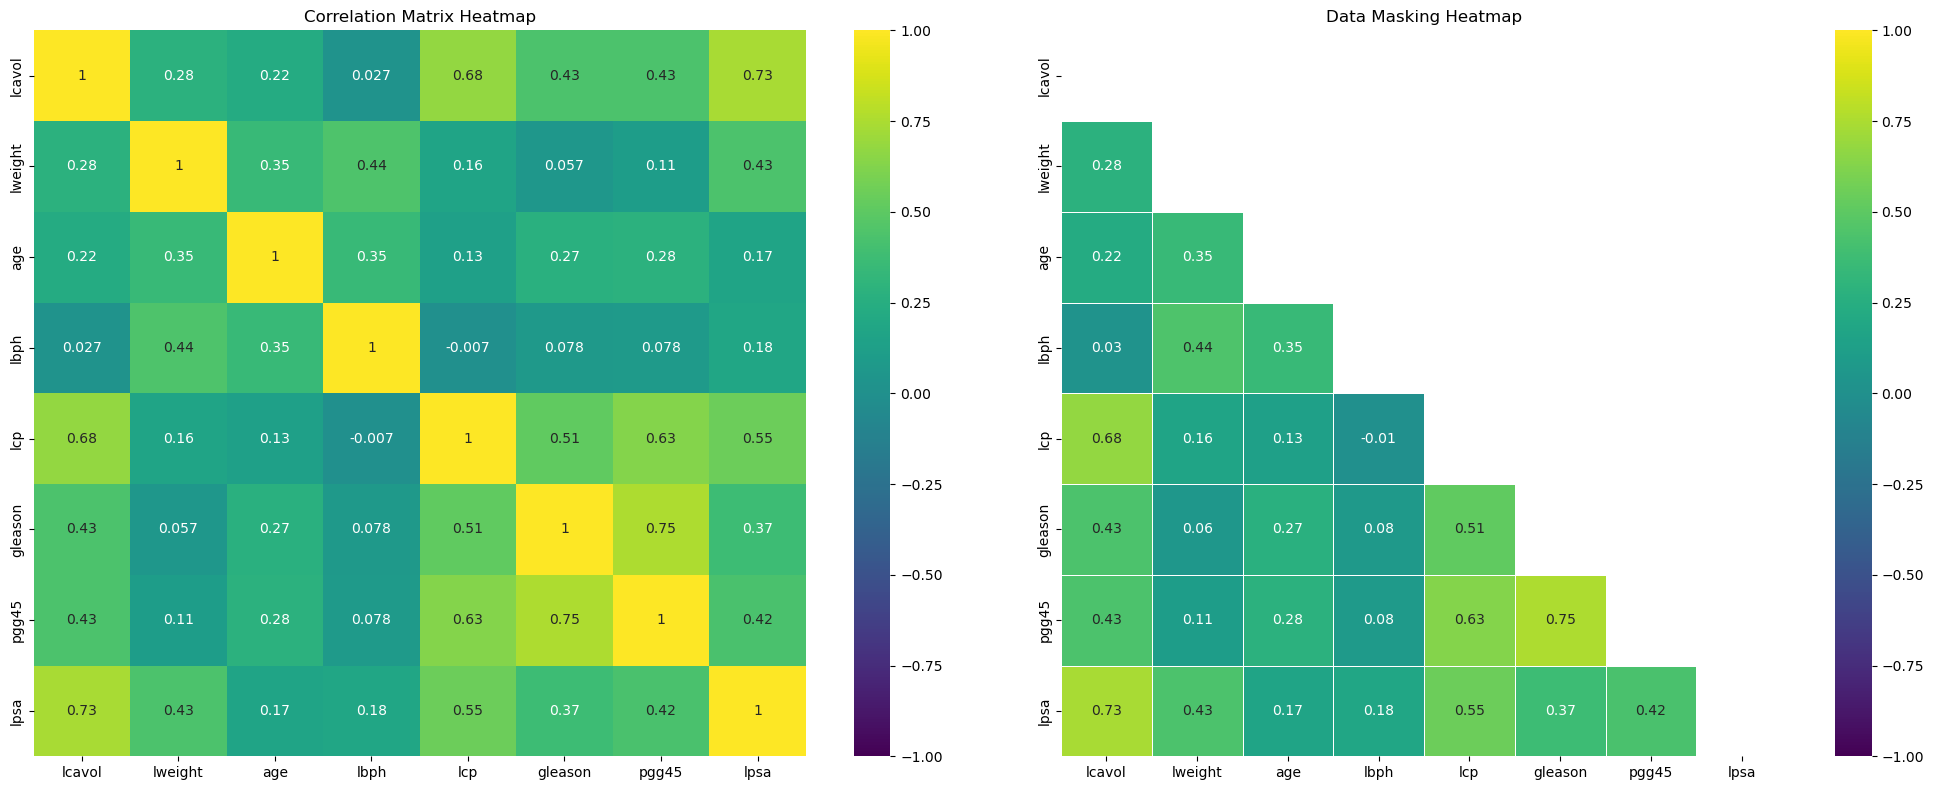

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

# Correlation Matrix Heatmap
sns.heatmap(data=cor.corr(), vmin=-1.0, vmax=1.0, annot=True, cmap="viridis", ax=axes[0])
axes[0].set_title('Correlation Matrix Heatmap')

# Create a mask using numpy's triu function
mask = np.triu(np.ones_like(cor.corr(), dtype=bool))

# Data Masking Heatmap
sns.heatmap(cor.corr(), cmap='viridis', vmin=-1, vmax=1, center=0, annot=True, fmt=".2f", square=True, linewidths=.5, mask=mask, ax=axes[1])
axes[1].set_title('Data Masking Heatmap')

plt.tight_layout()
plt.show()

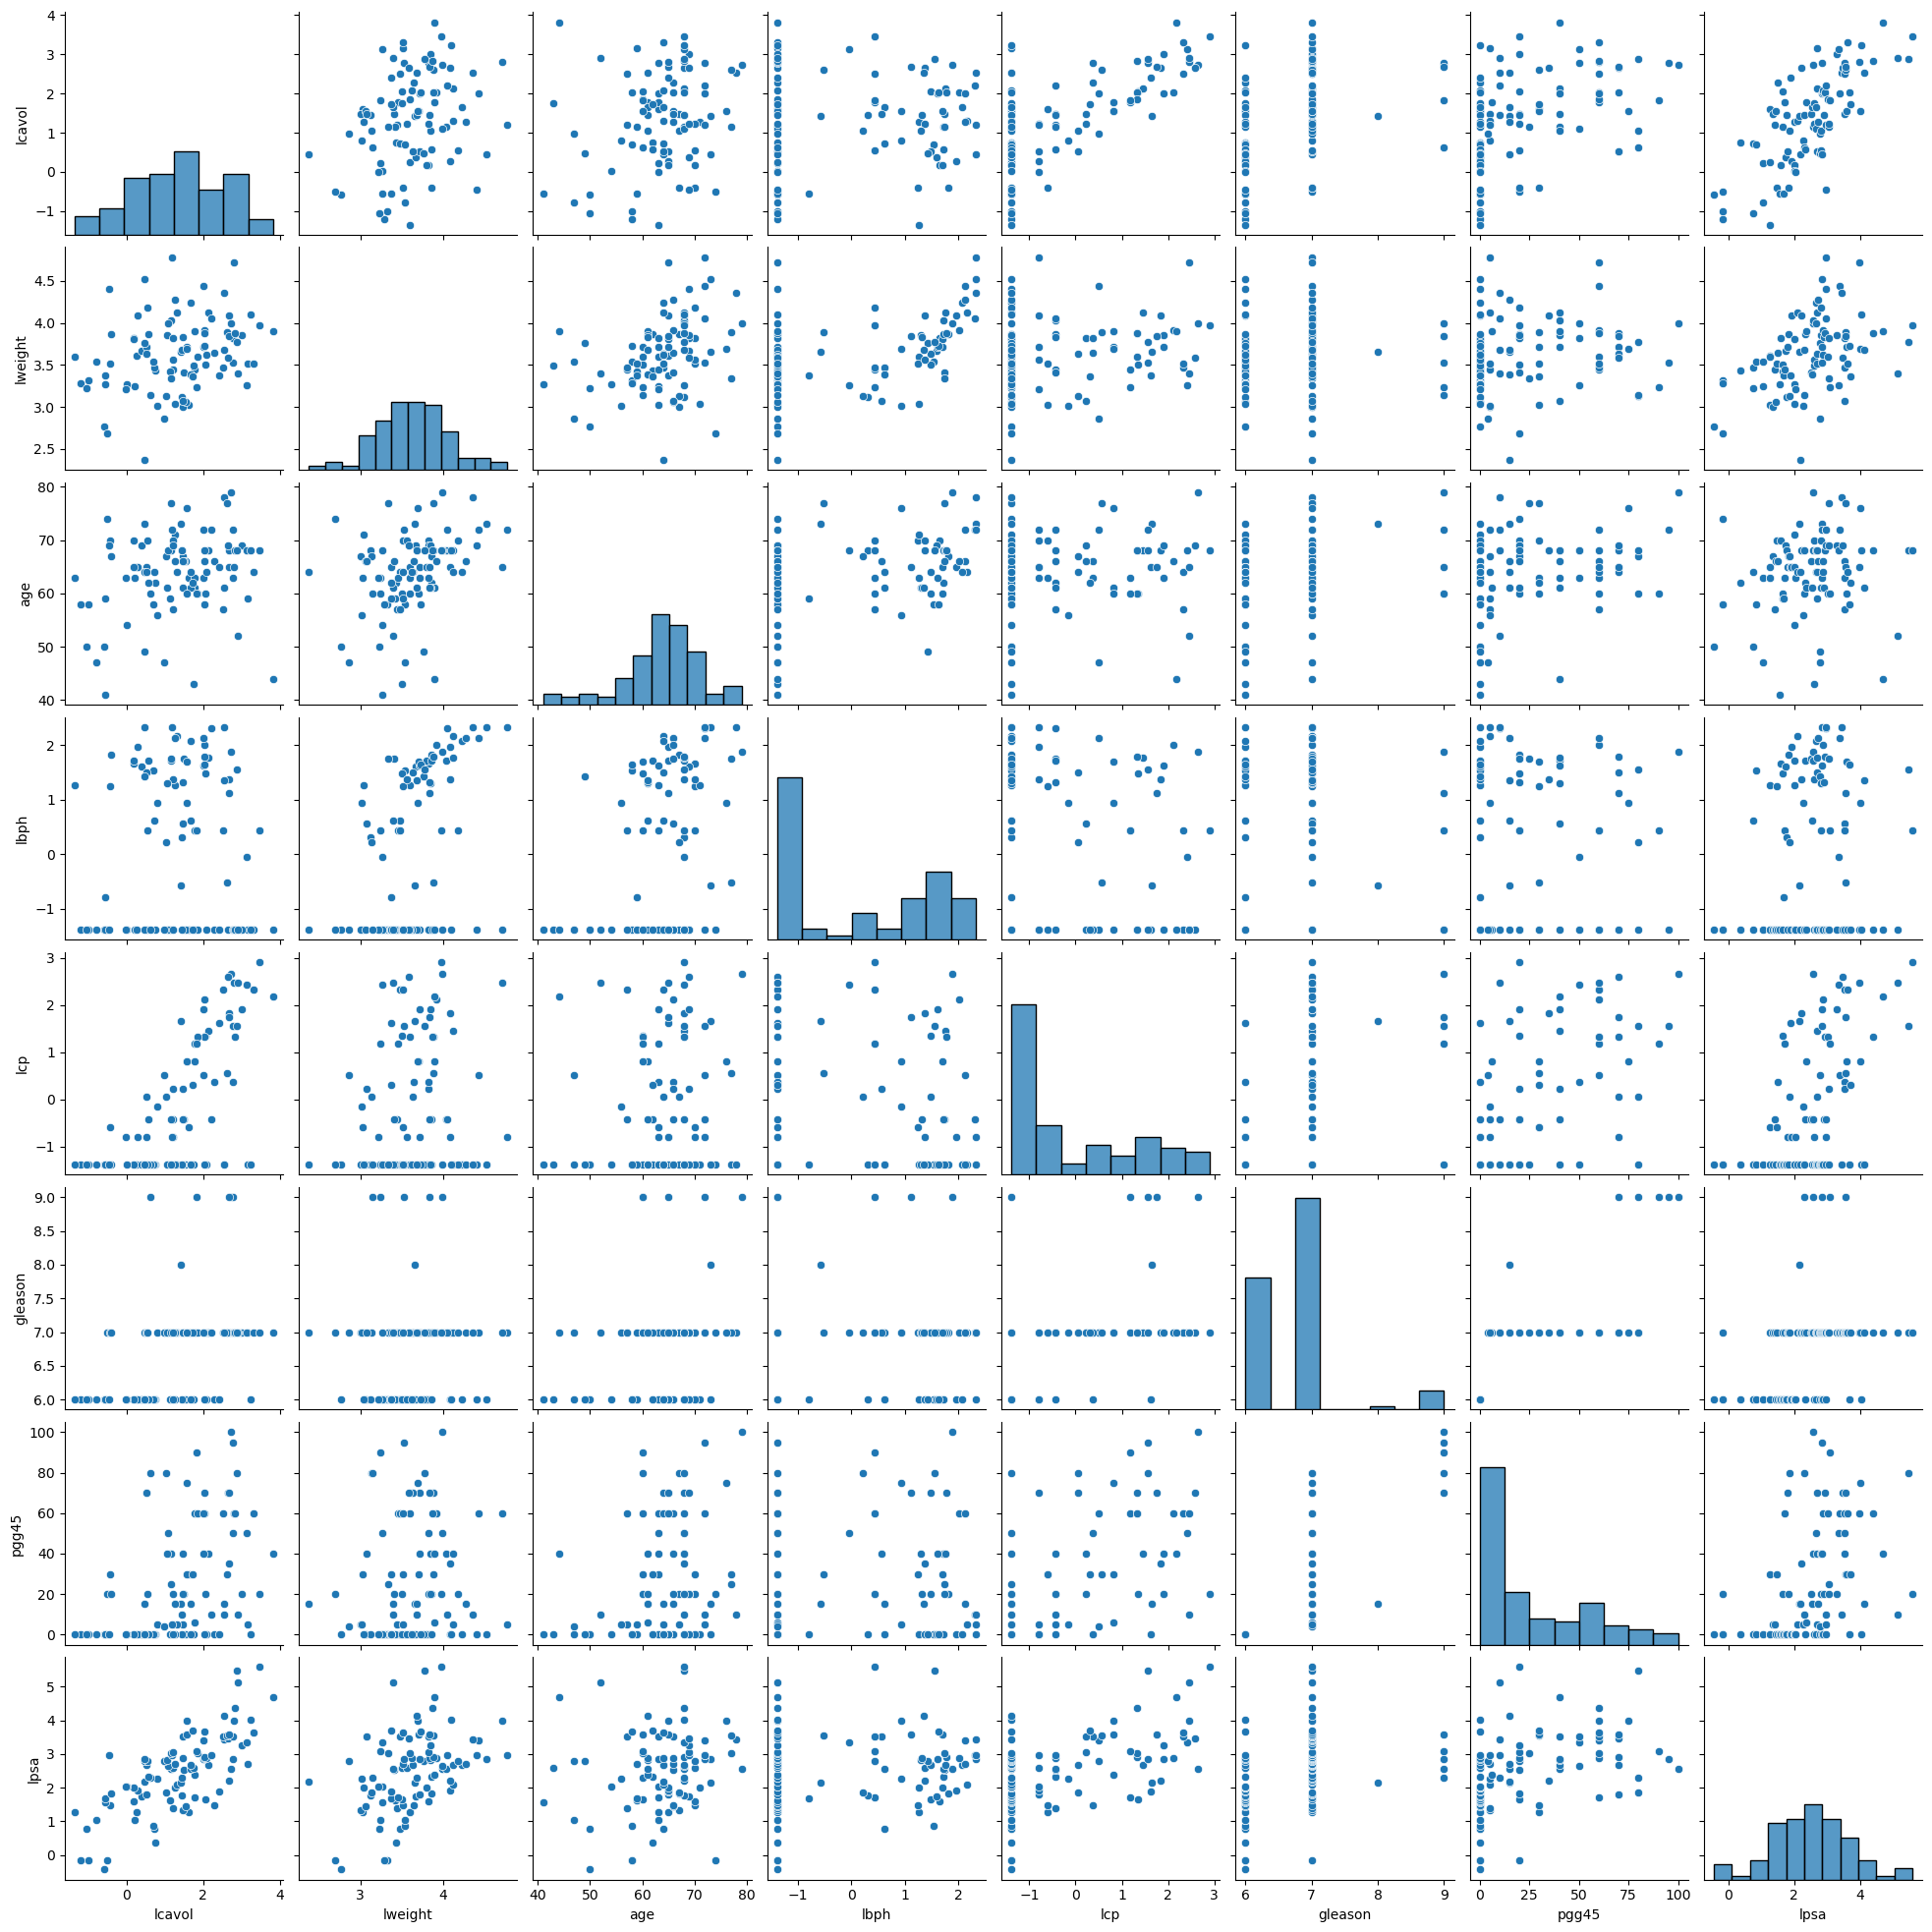

In [10]:
sns.pairplot(cor)

#### Normal Distribution with Quantile_Quantile Plot
Creating a **Quantile_Quantile Plot** to assess whether or not a set of data potentially came from some theoretical distribution.

Reading Sources:
[qqplot (Quantile-Quantile Plot) in Python](https://www.geeksforgeeks.org/qqplot-quantile-quantile-plot-in-python/)

#### Data Range

In [5]:
for column in df.select_dtypes(include=[np.number]).columns:
    print(f"Range of {column}: {df[column].min()} to {df[column].max()}")

Range of lcavol: -1.347073648 to 3.821003607
Range of lweight: 2.374906 to 4.780383
Range of age: 41 to 79
Range of lbph: -1.38629436 to 2.32630162
Range of svi: 0 to 1
Range of lcp: -1.38629436 to 2.90416508
Range of gleason: 6 to 9
Range of pgg45: 0 to 100
Range of lpsa: -0.4307829 to 5.5829322


In [ ]:
df['train'].describe()

count    97.000000
mean      0.690722
std       0.464597
min       0.000000
25%       0.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: train, dtype: float64

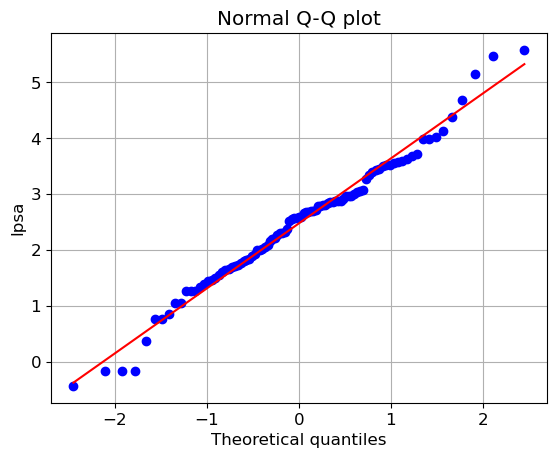

In [ ]:
stats.probplot(df['lpsa'], dist="norm", plot=plt)
plt.title('Normal Q-Q plot')
plt.xlabel('Theoretical quantiles')
plt.ylabel('lpsa')
plt.grid(True)
plt.show()

## Split Data
Since the `df` has already had `train` columns for training (`T`) and testing (`F`) data, no need to manually split `df` into training and testing sets. However, **features** and **target** variables are still needed to be separated into `X` and `y`.


In [3]:
# Create training dataset
trainD = df[df['train'] == 'T'].drop('train', axis=1)
print(f'Number of trained data: {trainD.shape[0]}')
# Create testing dataset
testD = df[df['train'] == 'F'].drop('train', axis=1)
print(f'Number of tested data: {testD.shape[0]}')

Number of trained data: 67
Number of tested data: 30


In [88]:
trainD.head()

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa
0,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0,-0.430783
1,-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0,-0.162519
2,-0.510826,2.691243,74,-1.386294,0,-1.386294,7,20,-0.162519
3,-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0,-0.162519
4,0.751416,3.432373,62,-1.386294,0,-1.386294,6,0,0.371564


In [89]:
testD.head()

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa
6,0.737164,3.473518,64,0.615186,0,-1.386294,6,0,0.765468
8,-0.776529,3.539509,47,-1.386294,0,-1.386294,6,0,1.047319
9,0.223144,3.244544,63,-1.386294,0,-1.386294,6,0,1.047319
14,1.205971,3.442019,57,-1.386294,0,-0.430783,7,5,1.398717
21,2.059239,3.501043,60,1.474763,0,1.348073,7,20,1.658228


In [4]:
# Separate the features and target variables
X_train = trainD.drop('lpsa', axis=1)
y_train = trainD['lpsa']

X_test = testD.drop('lpsa', axis=1)
y_test = testD['lpsa']

## Scale Data
Since we will perform linear regression on this dataset, we will **standardize** instead of normalize the dataset.

In [6]:
xscaled = StandardScaler()
X_train_scaled = xscaled.fit_transform(X_train)
X_test_scaled = xscaled.transform(X_test)

## Build Model

### Scaled

In [12]:
scaledModel = LinearRegression()
scaledModel.fit(X_train_scaled, y_train)

LinearRegression()

### Unscale

In [20]:
unscaleModel = LinearRegression()
unscaleModel.fit(X_train, y_train)

LinearRegression()

## Model Prediction

### Unscale 

In [23]:
print(f"Quick evaluation of the model: {unscaleModel.score(X_test, y_test)}")

Quick evaluation of the model: 0.5033798502381794


In [21]:
unscaled_y_pred = unscaleModel.predict(X_test)

In [25]:
unscaled_y_pred

array([1.96903844, 1.16995577, 1.26117929, 1.88375914, 2.54431886,
       1.93275402, 2.04233571, 1.83091625, 1.99115929, 1.32347076,
       2.93843111, 2.20314404, 2.166421  , 2.79456237, 2.67466879,
       2.18057291, 2.40211068, 3.02351576, 3.21122283, 1.38441459,
       3.41751878, 3.70741749, 2.54118337, 2.72969658, 2.64055575,
       3.48060024, 3.17136269, 3.2923494 , 3.11889686, 3.76383999])

In [26]:
y_test

6     0.765468
8     1.047319
9     1.047319
14    1.398717
21    1.658228
24    1.731656
25    1.766442
27    1.816452
31    2.008214
33    2.021548
35    2.085672
41    2.307573
43    2.374906
47    2.568788
48    2.591516
49    2.591516
52    2.684440
53    2.691243
54    2.704711
56    2.788093
61    2.853592
63    2.882004
64    2.882004
65    2.887590
72    3.056357
73    3.075006
79    3.513037
83    3.570940
94    5.143124
96    5.582932
Name: lpsa, dtype: float64

#### Residuals - Errors

In [27]:
unscaled_residuals = y_test - unscaled_y_pred
unscaled_residuals

6    -1.203571
8    -0.122637
9    -0.213860
14   -0.485042
21   -0.886091
24   -0.201099
25   -0.275894
27   -0.014464
31    0.017055
33    0.698077
35   -0.852759
41    0.104429
43    0.208485
47   -0.225774
48   -0.083152
49    0.410943
52    0.282330
53   -0.332273
54   -0.506512
56    1.403678
61   -0.563926
63   -0.825414
64    0.340820
65    0.157894
72    0.415801
73   -0.405595
79    0.341674
83    0.278591
94    2.024228
96    1.819092
Name: lpsa, dtype: float64

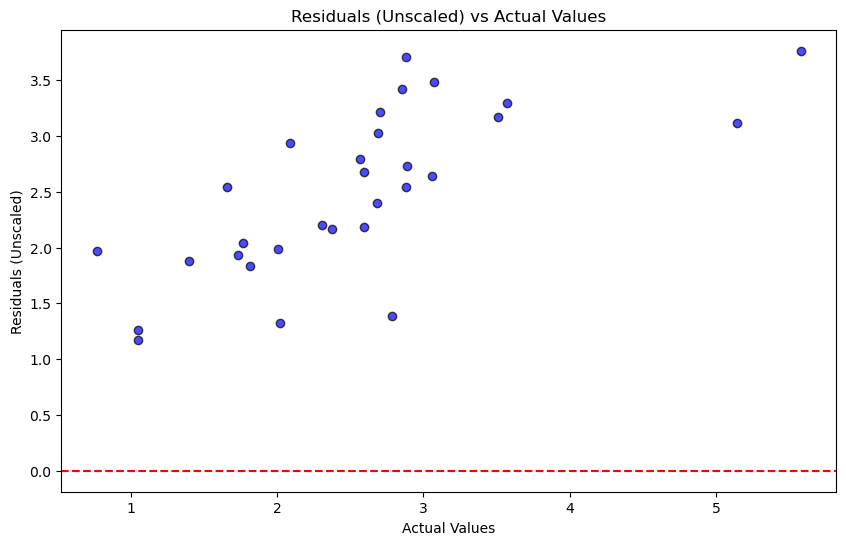

In [22]:

plt.figure(figsize=(10, 6))
plt.scatter(y_test, unscaled_y_pred, color='blue', edgecolor='k', alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Residuals (Unscaled)')
plt.title('Residuals (Unscaled) vs Actual Values')
plt.show()

### Scale

In [24]:
scaled_y_pred = scaledModel.predict(X_test_scaled)
print(f'Quick evaluation of the model: {scaledModel.score(X_test_scaled, y_test)}')
scaledResiduals = y_test - scaled_y_pred

Quick evaluation of the model: 0.5033798502381809


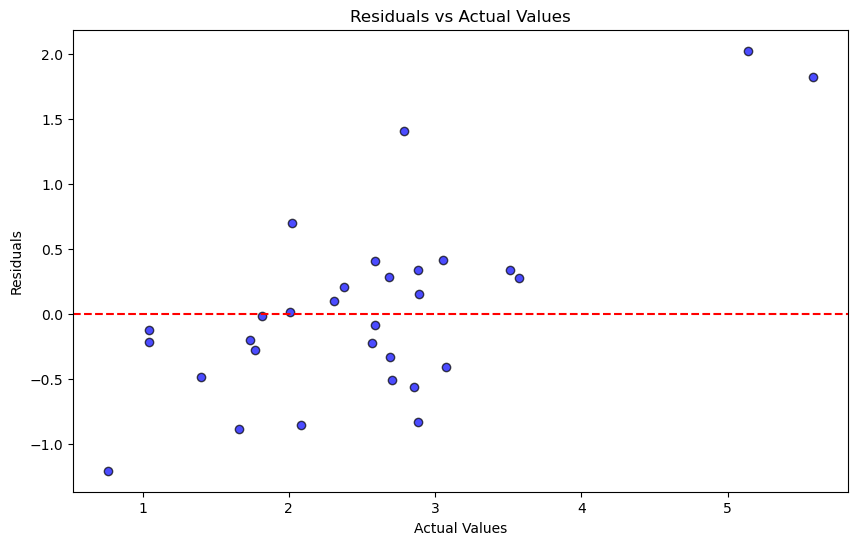

In [14]:
# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_test, scaledResiduals, color='blue', edgecolor='k', alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Actual Values')
plt.show()

## Model Evaluation

### Model on Unscale Data

In [97]:
print(f"Predicted values: {y_pred}")
print(f"Actual values: {y_test.values}")
print(f"Model Coefficients: {unscaleModel.coef_}")
print(f"Model Intercept: {unscaleModel.intercept_}")
print(f"Mean Squared Error: {np.mean((y_pred - y_test)**2)}")
print(f"Root Mean Squared Error: {np.sqrt(np.mean((y_pred - y_test)**2))}")
print(f"R-squared: {unscaleModel.score(X_test, y_test)}")
print(f"Adjusted R-squared: {1 - (1-unscaleModel.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)}")
print(f"Mean Absolute Error: {np.mean(np.abs(y_pred - y_test))}")
print(f"Mean Absolute Percentage Error: {np.mean(np.abs((y_pred - y_test) / y_test)) * 100}")
print(f"Coefficient of Determination: {1 - (np.sum((y_test - y_pred)**2) / np.sum((y_test - np.mean(y_test))**2))}")

Predicted values: [1.96903844 1.16995577 1.26117929 1.88375914 2.54431886 1.93275402
 2.04233571 1.83091625 1.99115929 1.32347076 2.93843111 2.20314404
 2.166421   2.79456237 2.67466879 2.18057291 2.40211068 3.02351576
 3.21122283 1.38441459 3.41751878 3.70741749 2.54118337 2.72969658
 2.64055575 3.48060024 3.17136269 3.2923494  3.11889686 3.76383999]
Actual values: [0.7654678 1.047319  1.047319  1.3987169 1.6582281 1.7316555 1.7664417
 1.8164521 2.008214  2.0215476 2.0856721 2.3075726 2.3749058 2.5687881
 2.5915164 2.5915164 2.6844403 2.6912431 2.7047113 2.7880929 2.8535925
 2.8820035 2.8820035 2.8875901 3.0563569 3.0750055 3.5130369 3.5709402
 5.1431245 5.5829322]
Model Coefficients: [ 0.57654319  0.61402    -0.01900102  0.14484808  0.73720864 -0.20632423
 -0.02950288  0.00946516]
Model Intercept: 0.4291701328490891
Mean Squared Error: 0.5212740055076016
Root Mean Squared Error: 0.7219930785731963
R-squared: 0.5033798502381794
Adjusted R-squared: 0.31419122175748593
Mean Absolute Err

#### Review and Interpretation of Evaluation Metrics

#### Predicted vs. Actual Values
- **Predicted Values**: The model's predictions for the `lpsa` values.
- **Actual Values**: The true `lpsa` values from the test set.

#### Model Coefficients and Intercept
- **Model Coefficients**: `[ 0.57654319,  0.61402, -0.01900102,  0.14484808,  0.73720864, -0.20632423, -0.02950288,  0.00946516]`
  - These coefficients represent the weights assigned to each feature in the linear regression model.
- **Model Intercept**: `0.4291701328490891`
  - This is the point where the regression line intercepts the y-axis.

#### Evaluation Metrics
- **Mean Squared Error (MSE)**: `0.5212740055076016`
  - This metric measures the average squared difference between the predicted and actual values. A lower MSE indicates better model performance.
- **Root Mean Squared Error (RMSE)**: `0.7219930785731963`
  - This is the square root of the MSE, providing a measure of the average magnitude of the prediction errors in the same units as the target variable.
- **R-squared**: `0.5033798502381794`
  - This metric indicates the proportion of the variance in the dependent variable that is predictable from the independent variables. An R-squared value of 0.503 suggests that approximately 50.3% of the variance in `lpsa` is explained by the model.
- **Adjusted R-squared**: `0.31419122175748593`
  - This metric adjusts the R-squared value for the number of predictors in the model. It is a more accurate measure of model performance, especially when multiple predictors are involved. An adjusted R-squared of 0.314 suggests that the model explains approximately 31.4% of the variance in `lpsa`, accounting for the number of predictors.
- **Mean Absolute Error (MAE)**: `0.5233719426769027`
  - This metric measures the average absolute difference between the predicted and actual values. A lower MAE indicates better model performance.
- **Mean Absolute Percentage Error (MAPE)**: `23.22754728106492`
  - This metric measures the average absolute percentage difference between the predicted and actual values. A MAPE of 23.23% indicates that, on average, the model's predictions are off by 23.23% from the actual values.
- **Coefficient of Determination**: `0.5033798502381794`
  - This is another term for R-squared, indicating the proportion of variance explained by the model.


***Interpretation***

- **Model Performance**: The model explains approximately 50.3% of the variance in `lpsa` (R-squared = 0.503). However, the adjusted R-squared value of 0.314 suggests that the model's explanatory power decreases when accounting for the number of predictors.
- **Error Metrics**: The RMSE of 0.722 and MAE of 0.523 indicate that the model's predictions have an average error of around 0.722 and 0.523 units, respectively. The MAPE of 23.23% indicates that the model's predictions are, on average, 23.23% off from the actual values.
- **Coefficients**: The coefficients indicate the direction and magnitude of the relationship between each feature and the target variable `lpsa`. Positive coefficients suggest a positive relationship, while negative coefficients suggest a negative relationship.


***Conclusion***

The model has moderate explanatory power, explaining around 50.3% of the variance in `lpsa`. The error metrics indicate that there is room for improvement in the model's predictive accuracy. The adjusted R-squared value suggests that some predictors may not be contributing significantly to the model, and further feature selection or engineering may be beneficial.

### Model on Scaled Data

In [19]:
# Calculate and print evaluation metrics
mse = mean_squared_error(y_test, scaled_y_pred)
mae = mean_absolute_error(y_test, scaled_y_pred)
r2 = r2_score(y_test, scaled_y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.5212740055076002
Mean Absolute Error: 0.5233719426769012
R-squared: 0.5033798502381809
